In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [28]:
data_train_path = 'C:\\Users\\NOOR\\Desktop\\project\\Fruits_Vegetables\\test'
data_test_path = 'C:\\Users\\NOOR\\Desktop\\project\\Fruits_Vegetables\\train'
data_val_path = 'C:\\Users\\NOOR\\Desktop\\project\\Fruits_Vegetables\\validation'

In [29]:
img_width = 180
img_height =180 

In [30]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


In [31]:
data_cat = data_train.class_names

In [32]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [33]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [34]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


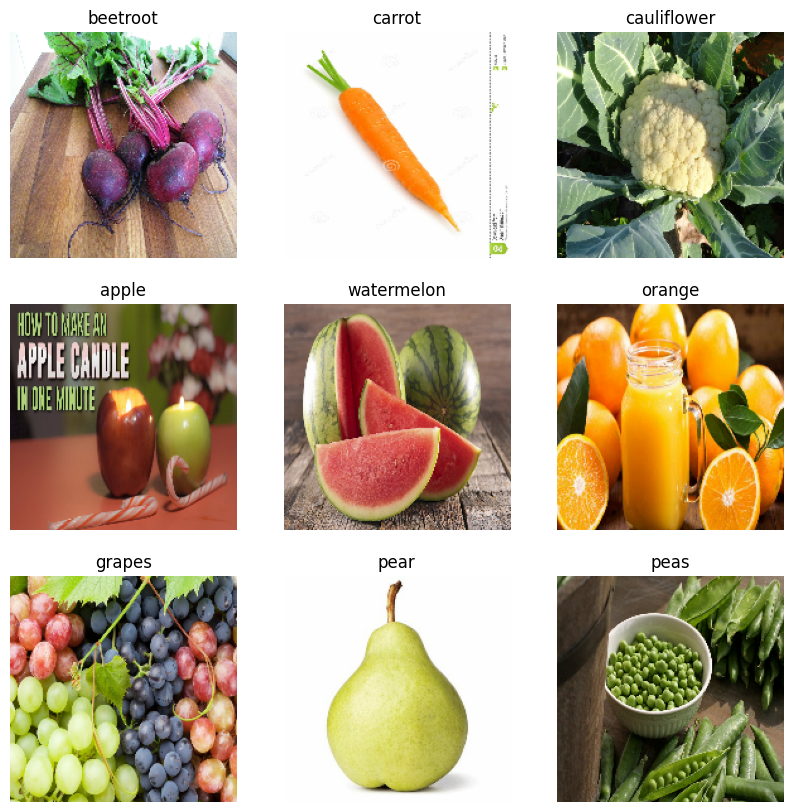

In [35]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [39]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [40]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.0359 - loss: 4.4691 - val_accuracy: 0.1197 - val_loss: 3.4689
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.0924 - loss: 3.4445 - val_accuracy: 0.1909 - val_loss: 3.0434
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.2070 - loss: 2.9749 - val_accuracy: 0.2365 - val_loss: 2.6660
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.3547 - loss: 2.3981 - val_accuracy: 0.6325 - val_loss: 1.6069
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.6445 - loss: 1.4947 - val_accuracy: 0.6923 - val_loss: 1.0597
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.6977 - loss: 1.0861 - val_accuracy: 0.9031 - val_loss: 0.6132
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.8458 - loss: 0.6821 - val_accuracy: 0.9373 - val_loss: 0.3442
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.9163 - loss: 0.3919 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

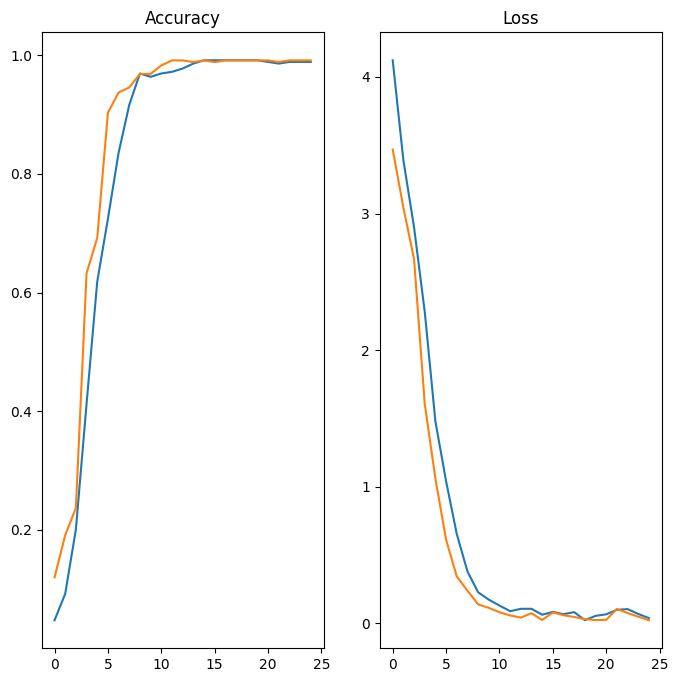

In [41]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [10]:
image = 'C:\\Users\\NOOR\\Desktop\\project\\corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

NameError: name 'tf' is not defined

In [8]:
predict = model.predict(img_bat)

NameError: name 'model' is not defined

In [9]:
score = tf.nn.softmax(predict)

NameError: name 'tf' is not defined

In [12]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

NameError: name 'data_cat' is not defined

In [11]:
model.save('Image_classify.keras')

NameError: name 'model' is not defined